In [1]:
# imports 
import matplotlib.pyplot as plt
from pydub import AudioSegment
import moviepy.editor as mp
import numpy as np
import wave, sys
import os
import cv2
from scipy.fft import rfft, rfftfreq
import shutil
import time
import datetime

In [2]:
startTime = time.time()

In [3]:
target = "Pornhub"
targetDir = target + "/"
audioDir = "Audio/"
outputDir = "Output/"

#Create project directory
if os.path.exists(targetDir)!=True:
    os.mkdir(targetDir)
if os.path.exists(targetDir+audioDir)!=True:
    os.mkdir(targetDir+audioDir)
if os.path.exists(targetDir+outputDir)!=True:
    os.mkdir(targetDir+outputDir)
shutil.move(target+".mp3", targetDir+audioDir+target+".mp3")

'Pornhub/Audio/Pornhub.mp3'

In [4]:
sound = AudioSegment.from_mp3(targetDir+audioDir+target+".mp3")#Convert mp3 stereo to wav mono
sound = sound.set_channels(1)
sound.export(targetDir+audioDir+target+"Mono.wav", format="wav")

# reading the audio file 
raw = wave.open(targetDir+audioDir+target+"Mono.wav")
raw.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=135168, comptype='NONE', compname='not compressed')

In [5]:
# reads all the frames  
# -1 indicates all or max frames 
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16") 

In [6]:
# gets the frame rate 
f_rate = raw.getframerate()

In [7]:
# to Plot the x-axis in seconds  
# you need get the frame rate  
# and divide by size of your signal 
# to create a Time Vector  
# spaced linearly with the size  
# of the audio file 
audioTime = np.linspace( 
    0, # start 
    len(signal) / f_rate, 
    num = len(signal) 
) 
print(len(audioTime))
print(len(signal))

135168
135168


x and y must have same first dimension, but have shapes (736,) and (700,)Time taking on execution: 0:01:15


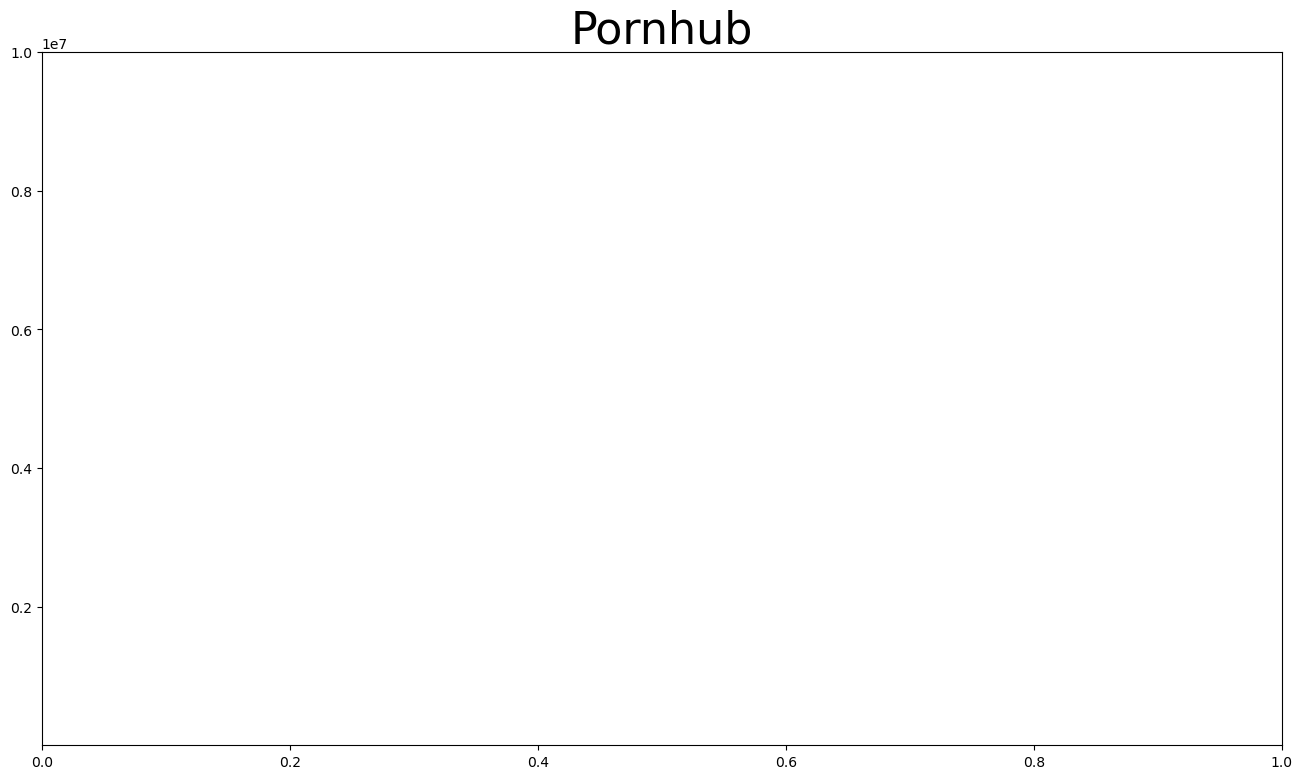

In [8]:
DURATION = 1/30  # 1/30 sec
frameDuration = int(f_rate*DURATION) # 1/30sec
# Number of samples in normalized_tone
N = frameDuration
itter = 0

try:
    for i in np.arange(0, len(signal), frameDuration):
        # Note the extra 'r' at the front
        yf = rfft(signal[i:i+frameDuration])
        xf = rfftfreq(N, 1/f_rate)
        print("Processing frame: " + str(itter) + " of " + "{:.3f}".format(len(signal)/frameDuration-1) + " Which is " + "{:.3f}".format(itter/30) + " seconds. Progress: " + "{:.3f}".format((i/len(signal))*100) + "% " + "Time taking on execution: " + str(datetime.timedelta(seconds=int(time.time()-startTime))), end='\r')
        plt.figure(figsize=(16,9))
        plt.ylim(0.01, 10000000)
        plt.title(target, fontsize=32)
        plt.plot(xf, np.abs(yf))#For normal view
        plt.semilogy(xf, np.abs(yf))#For log view
        plt.xlabel('Frequency (Hz)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
        plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

        plt.margins(x=0)
        plt.savefig(targetDir+outputDir+target+str(itter), dpi=300)
        #plt.clf()
        plt.close()
        itter+=1
except Exception as e:
    print(e)
    pass

In [9]:
out_video_name = target +"FFT" + ".mp4"
out_video_full_path = targetDir+outputDir+out_video_name

pre_imgs = os.listdir(targetDir+outputDir)
#print(pre_imgs)
img = []

for i in range(0, len(pre_imgs), 1):
    filename = targetDir+outputDir+target+str(i)+".png"
    #print(i)
    img.append(filename)

# print(img)

cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')

frame = cv2.imread(img[0])
size = list(frame.shape)
del size[2]
size.reverse()
# print(size)

video = cv2.VideoWriter(out_video_full_path, cv2_fourcc, 30, size) #output video name, fourcc, fps, size

for i in range(len(img)): 
    video.write(cv2.imread(img[i]))
    print("Processing frame: " + str(i) + " of " + str(len(img)-1) + " Which is " + "{:.3f}".format(i/30) + " seconds. Progress: " + "{:.3f}".format((i/len(img))*100) + "%" + "Time taking on execution: " + str(datetime.timedelta(seconds=int(time.time()-startTime))), end='\r')

video.release()
print('outputed video')

outputed videome: 92 of 92 Which is 3.067 seconds. Progress: 98.925%Time taking on execution: 0:01:35


In [10]:
#Add audio to video
video = mp.VideoFileClip(out_video_full_path)
print("Video duration: " + str(video.duration))
audio = mp.AudioFileClip(targetDir+audioDir+target+".mp3")
print("Audio duration: " + str(audio.duration))
if video.duration>audio.duration:
    video = video.subclip(0, audio.duration)
    print("Cliped video")
elif audio.duration>video.duration:
    audio = audio.subclip(0, video.duration)
    print("Cliped audio")
print("Video duration: " + str(video.duration))
print("Audio duration: " + str(audio.duration))
video.audio = audio
video.write_videofile(targetDir+outputDir+target+".mp4")


Video duration: 3.03
Audio duration: 3.11
Cliped audio
Video duration: 3.03
Audio duration: 3.03
Moviepy - Building video Pornhub/Output/Pornhub.mp4.
MoviePy - Writing audio in PornhubTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video Pornhub/Output/Pornhub.mp4



Moviepy - Done !
Moviepy - video ready Pornhub/Output/Pornhub.mp4


In [11]:
print( "Program finnished, time taken: " + "Time taking on execution: " + str(datetime.timedelta(seconds=int(time.time()-startTime))))

Program finnished, time taken: Time taking on execution: 0:02:03


[1]R. Python, “Fourier Transforms With scipy.fft: Python Signal Processing – Real Python,” realpython.com. <br>https://realpython.com/python-scipy-fft/

[2]“Plotting Various Sounds on Graphs using Python and Matplotlib,” GeeksforGeeks, Jul. 26, 2020. <br>https://www.geeksforgeeks.org/plotting-various-sounds-on-graphs-using-python-and-matplotlib/